In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h2>Import the data and modifying columns</h2>

In [5]:
# Import Personal Data
personal_df = pd.DataFrame(pd.read_csv('../input/PlayerPersonalData.csv'))
personal_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
personal_df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
10804,155625,Kim Chi Woo,33,https://cdn.sofifa.org/48/18/players/155625.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,65,65,FC Seoul,https://cdn.sofifa.org/24/18/teams/982.png,€210K,€2K,1927
1041,182882,C. Sánchez,31,https://cdn.sofifa.org/48/18/players/182882.png,Colombia,https://cdn.sofifa.org/flags/56.png,77,77,Fiorentina,https://cdn.sofifa.org/24/18/teams/110374.png,€6M,€56K,1940
6127,210280,P. Ziegler,27,https://cdn.sofifa.org/48/18/players/210280.png,Germany,https://cdn.sofifa.org/flags/21.png,69,70,1. FC Kaiserslautern,https://cdn.sofifa.org/24/18/teams/29.png,€1M,€8K,1614
763,203627,Joãozinho,28,https://cdn.sofifa.org/48/18/players/203627.png,Brazil,https://cdn.sofifa.org/flags/54.png,78,78,FC Krasnodar,https://cdn.sofifa.org/24/18/teams/112218.png,€10.5M,€47K,2068
7576,214495,E. Mosquera,26,https://cdn.sofifa.org/48/18/players/214495.png,Colombia,https://cdn.sofifa.org/flags/56.png,68,71,Envigado FC,https://cdn.sofifa.org/24/18/teams/112526.png,€925K,€1K,1712


In [6]:
# Import the Position Data
position_df = pd.DataFrame(pd.read_csv('../input/PlayerPlayingPositionData.csv')).fillna(0)
position_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Change the dtype of columns
pos_columns = [col for col in position_df.columns if (col != 'ID') & (col != 'Preferred Positions')]
position_df[pos_columns] = position_df[pos_columns].astype(int)
position_df.sample(5)

,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
7341,59,67,66,58,62,162980,59,67,67,62,66,58,62,56,60,67,LWB LB,59,67,67,62,66,58,62,56,60,67,56
14793,42,59,56,41,46,233885,42,58,59,46,56,41,44,41,41,56,CB,42,58,59,46,56,41,44,41,41,56,41
2113,48,73,64,49,51,225060,48,66,73,51,64,49,50,51,49,63,CB,48,66,73,51,64,49,50,51,49,63,51
12347,62,34,45,61,58,230768,62,44,34,58,45,61,63,56,63,48,CAM,62,44,34,58,45,61,63,56,63,48,56
3555,65,45,48,68,59,216408,65,47,45,59,48,68,64,71,65,49,ST,65,47,45,59,48,68,64,71,65,49,71


<h2>Personal Data Analysis</h2>

<h3>Attributes Preview</h3>

In [8]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 13 columns):
ID             17981 non-null int64
Name           17981 non-null object
Age            17981 non-null int64
Photo          17981 non-null object
Nationality    17981 non-null object
Flag           17981 non-null object
Overall        17981 non-null int64
Potential      17981 non-null int64
Club           17733 non-null object
Club Logo      17981 non-null object
Value          17981 non-null object
Wage           17981 non-null object
Special        17981 non-null int64
dtypes: int64(5), object(8)
memory usage: 1.8+ MB


In [9]:
# Dropping the useless attributes
personal_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

In [10]:
# Top 10 players by Overall ratings
personal_df.sort_values(by=['Overall', 'Potential'], ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493
5,188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143
6,193080,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458
7,183277,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096
8,182521,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165
9,167664,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961


<h3>Top Overall Clubs</h3>

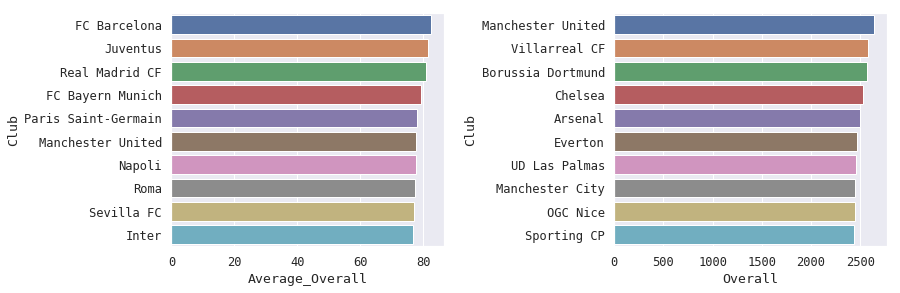

In [11]:
# Plotting the top clubs with best overall sum
top_overall_clubs = personal_df[['Overall', 'Potential', 'Club']].copy()
top_overall_clubs['Count'] = 1
top_overall_clubs = top_overall_clubs.groupby(['Club'], as_index=False).sum()
top_overall_clubs['Average_Overall'] = np.around((top_overall_clubs['Overall'] / top_overall_clubs['Count']), decimals=2)

# Plot the top 5 clubs
sns.set(style='darkgrid', palette='deep', font='monospace', font_scale=1.1, 
        rc={'figure.figsize':(12.7,4.27)})

fig, ax = plt.subplots(1, 2)
sns.barplot(y='Club', x='Average_Overall', 
            data=top_overall_clubs.sort_values(by=['Average_Overall'], ascending=False).head(10), 
            ax=ax[0])
sns.barplot(y='Club', x='Overall', 
            data=top_overall_clubs.sort_values(by=['Overall'], ascending=False).head(10), 
            ax=ax[1])
fig.tight_layout()

<h3>Top Clubs giving the most wages</h3>

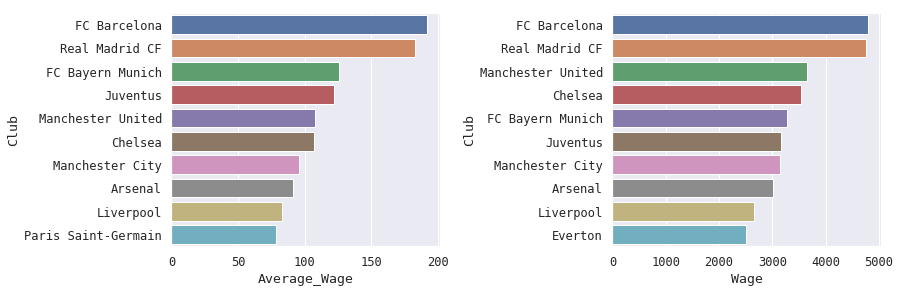

In [12]:
# Top Wage Clubs
top_wage_clubs = personal_df[['Club', 'Wage']].copy()
top_wage_clubs['Count'] = 1
top_wage_clubs['Wage'] = top_wage_clubs['Wage'].apply(lambda x: x[1:len(x)-1]).replace('', '0').astype(int)
top_wage_clubs = top_wage_clubs.groupby(['Club'], as_index=False).sum().sort_values(by=['Wage'], ascending=False)
top_wage_clubs['Average_Wage'] = np.around(top_wage_clubs['Wage'] / top_wage_clubs['Count'], decimals=2)

# Plot the top wages clubs
fig, ax = plt.subplots(1, 2)
sns.barplot(y='Club', x='Average_Wage', 
            data=top_wage_clubs.sort_values(by=['Average_Wage'], ascending=False).head(10), 
            ax=ax[0])
sns.barplot(y='Club', x='Wage', 
            data=top_wage_clubs.sort_values(by=['Wage'], ascending=False).head(10), 
            ax=ax[1])
fig.tight_layout()

<h3>Country/ Club with most count of best players</h3>

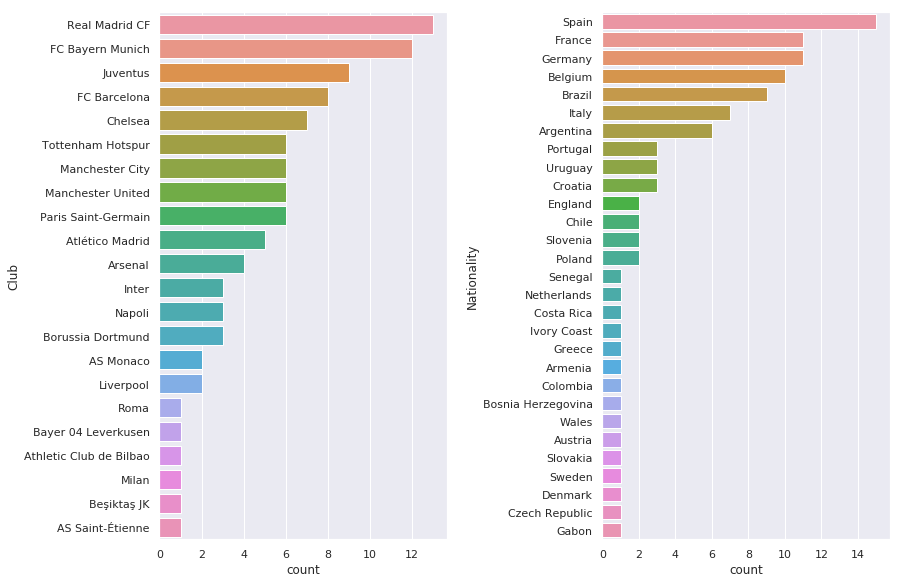

In [13]:
# Get the top 100 players
top_players = personal_df[['Nationality', 'Overall', 'Potential', 'Club']].loc[:100].copy()
top_players.sort_values(by=['Overall'], ascending=False)

# Plot the top wages clubs
sns.set(rc={'figure.figsize':(12.7, 8.27)})
fig, ax = plt.subplots(1, 2)
sns.countplot(y='Club', data=top_players, order=top_players['Club'].value_counts().index, ax=ax[0])
sns.countplot(y='Nationality', data=top_players, order=top_players['Nationality'].value_counts().index, ax=ax[1])
fig.tight_layout()

<h2>Position Data Analysis</h2>

In [14]:
position_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 28 columns):
CAM                    17981 non-null int64
CB                     17981 non-null int64
CDM                    17981 non-null int64
CF                     17981 non-null int64
CM                     17981 non-null int64
ID                     17981 non-null int64
LAM                    17981 non-null int64
LB                     17981 non-null int64
LCB                    17981 non-null int64
LCM                    17981 non-null int64
LDM                    17981 non-null int64
LF                     17981 non-null int64
LM                     17981 non-null int64
LS                     17981 non-null int64
LW                     17981 non-null int64
LWB                    17981 non-null int64
Preferred Positions    17981 non-null object
RAM                    17981 non-null int64
RB                     17981 non-null int64
RCB                    17981 non-null int64
RCM       

In [24]:
# Merge the clubs of the players into position dataframe
position_analysis = position_df.copy().sort_values(by=['ID'])
position_analysis['Club'] = personal_df.sort_values(by=['ID'])['Club']
position_analysis.head()

,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Club
4920,69,56,62,68,69,16,69,58,56,69,62,68,68,66,67,60,CAM CM,69,58,56,69,62,68,68,66,67,60,66,KAS Eupen
4963,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,GK,0,0,0,0,0,0,0,0,0,0,0,CA Osasuna
45,87,63,74,83,84,41,87,69,63,84,74,83,84,76,84,72,LM CM,87,69,63,84,74,83,84,76,84,72,76,FC Barcelona
693,76,66,74,72,78,80,76,66,66,78,74,72,73,67,72,69,CDM CM,76,66,66,78,74,72,73,67,72,69,67,İstanbul Başakşehir FK
16121,0,0,0,0,0,591,0,0,0,0,0,0,0,0,0,0,GK,0,0,0,0,0,0,0,0,0,0,0,Stevenage


In [16]:
# Separate the positions
def separate_positions(positions):
    defensive_positions = []
    midfield_positions = []
    attacking_positions = []
    
    for position in positions:
        if position[-1] == 'M':
            midfield_positions.append(position)
        elif position[-1] in ['B', 'W']:
            defensive_positions.append(position)
        elif position[-1] in ['F', 'S', 'T']:
            attacking_positions.append(position)
            
    return {'Defence': defensive_positions, 'Midfield': midfield_positions, 'Attack': attacking_positions}

In [35]:
# Analyse the positional play of a team
def Club_Positional_Play(club):
    # Get the players of the club
    club_positions = position_analysis.loc[position_analysis['Club'] == club]
    count_of_players = len(club_positions.index)
    
    # Take average of every position value
    club_positions = club_positions.groupby(['Club'], as_index=False).sum().drop(['Club', 'ID'], axis=1)
    club_positions[club_positions.columns] = np.around(club_positions[club_positions.columns] / count_of_players, decimals=2)
    
    # Sum the positions values
    positions = separate_positions(club_positions.columns)
    positions_value = {'Defence': [0], 'Midfield': [0], 'Attack': [0]}
    for area in positions.keys():
        for pos in positions[area]:
            positions_value[area] = [positions_value[area][0] + club_positions.loc[0, pos]]
            
        # Average of the area
        positions_value[area] = [np.around(positions_value[area][0] / len(positions[area]), decimals=2)]
    
    # Convert into a dataframe
    club_postional_df = pd.DataFrame.from_dict(positions_value)
    club_postional_df['Club'] = club
    return club_postional_df[['Club', 'Defence', 'Midfield', 'Attack']]

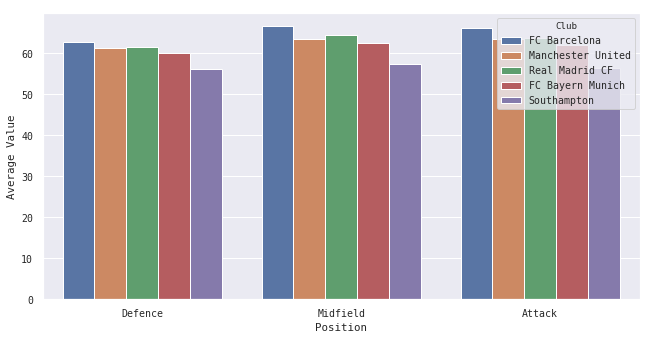

In [39]:
# Positional Plays of Clubs
clubs = ['FC Barcelona', 'Manchester United', 'Real Madrid CF', 'FC Bayern Munich', 'Southampton']
clubs_overview = pd.concat([Club_Positional_Play(club) for club in clubs], ignore_index=True)
clubs_overview = pd.melt(clubs_overview, id_vars='Club', var_name='Position', value_name='Average Value')

# Plot the positional plays
sns.set(style='darkgrid', palette='deep', font='monospace', font_scale=0.9, 
        rc={'figure.figsize':(10.7, 5.27)})
sns.barplot(y='Average Value', x='Position', hue='Club', data=clubs_overview)